# SVM Interactive Example:

(-1.6605562806099958, 13.47686996372207, -5.997790167436227, 6.017411169515086)

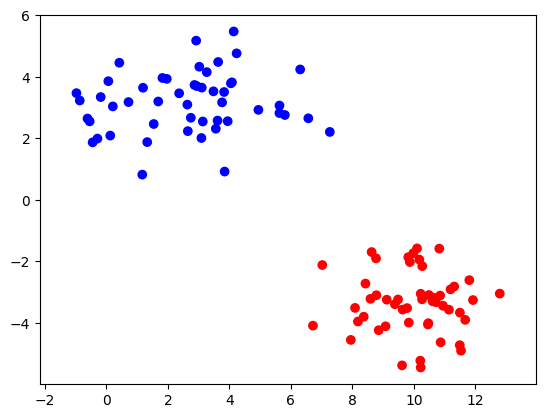

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Generate dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=18)
X = X*[1.7,1] + [-3,3]
y[y == 0] = -1  # Change labels from 0 to -1 for our SVM formulation

plt.scatter(*X.T, c=y, cmap='bwr')
plt.axis('equal')

In [2]:
def plot_svm_boundary(w1, w2, b):
    plt.figure(figsize=(6.5, 5))

    # Plot the dataset
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)

    # Create a grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))

    # Calculate decision boundary and margins
    w = np.array([w1,w2])
    yy_pred = (-w1 * xx - b) / w2
    margin = 1 / np.linalg.norm(w)
    gutter_up = yy_pred + margin
    gutter_down = yy_pred - margin

    # Plot the decision boundary and margins
    plt.plot(xx[0], yy_pred[0], 'k-', linewidth=2, label='Decision Boundary')
    plt.plot(xx[0], gutter_up[0], 'k--', linewidth=2, label='Margin')
    plt.plot(xx[0], gutter_down[0], 'k--', linewidth=2)

    # Plot the vector w and its span
    plt.arrow(0, 0, w1, w2, head_length=.3, head_width=.2)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid(True)
    plt.title(f'$|w|$ = {np.linalg.norm(w):.3f}, 2/|w| = {2/np.linalg.norm(w):.3f}')
    plt.show()


In [3]:
interactive_plot = interactive(plot_svm_boundary, w1=(-2.0, 2.0, 0.01), w2=(-2.0, 2.0, 0.01), b=(-5.0, 5.0))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

### Compute $z = \vec w \cdot \vec x + b$ for all data points, we'll call this value $z$. Histogram the values of $z$ with 30 bins

In [10]:
z = .14 * X[:,0] + (-.52) * X[:,1] + (-1.1)

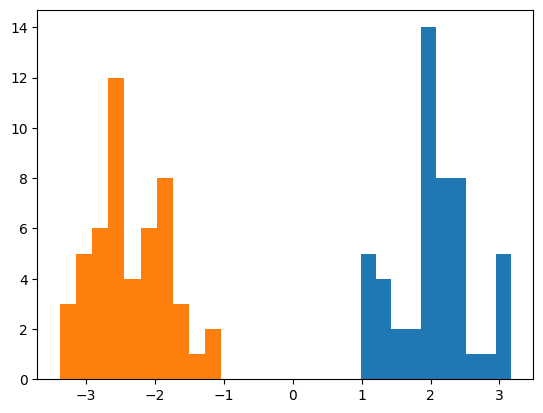

In [18]:
plt.hist(z[y==+1], bins=10)
plt.hist(z[y==-1], bins=10)
plt.show()

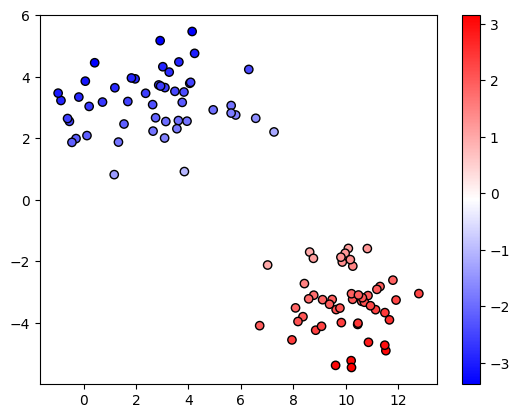

In [21]:
# Run this to plot the points colored by z value. See how it measures distance from the decision boundary?
plt.scatter(X[:, 0], X[:, 1], c=z, cmap='bwr', ec='k')
plt.colorbar()

## Once you're satisfied with your solution, compare to the actual SVM result:

w = (0.18, -0.47)
b = -1.25


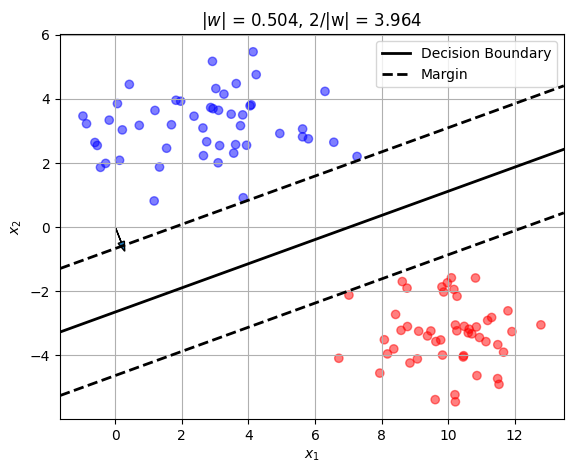

In [22]:
# Use sklearn SVM classifier and fit to data
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot the decision boundary of the sklearn SVM
print(f'w = ({clf.coef_[0,0]:.2f}, {clf.coef_[0,1]:.2f})')
print(f'b = {clf.intercept_[0]:.2f}')
plot_svm_boundary(clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0])


# Logistic Regression:

Let's make a toy dataset which is just two gaussian distributions

In [23]:
np.random.seed(7)
n_points = 1000
x_0 = np.random.normal(0,2,n_points)
x_1 = np.random.normal(3,1.5,n_points)
X = np.concatenate([x_0, x_1])
y = np.concatenate([np.zeros(n_points), np.ones(n_points)])

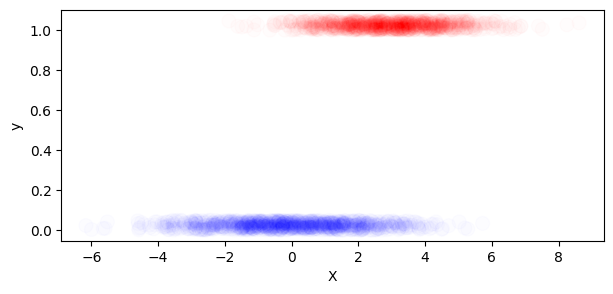

In [28]:
plt.figure(figsize=[7,3])
plt.scatter(X, y+.05*np.random.random(y.shape), s=100, alpha=.01, c=y, cmap='bwr')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [31]:
counts0, bins = np.histogram(x_0, np.linspace(-5,7,21))
counts1, bins = np.histogram(x_1, np.linspace(-5,7,21))
bin_centers = bins[:-1] + np.diff(bins)[0]/2

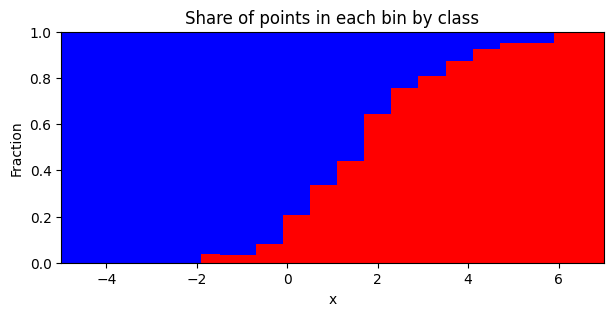

In [32]:
plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts1/(counts0+counts1), color='r')
plt.bar(bin_centers, counts0/(counts0+counts1), bottom=counts1/(counts0+counts1), color='b')
plt.xlim(-5,7)
plt.xlabel('x')
plt.ylabel('Fraction')
plt.title('Share of points in each bin by class')
plt.show()

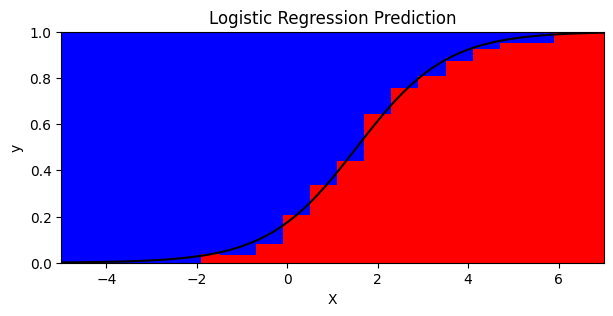

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# ## Fit a logistic regression model
model = LogisticRegression(solver='lbfgs', random_state=0)
model.fit(X.reshape(-1, 1), y)

plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts1/(counts0+counts1), color='r')
plt.bar(bin_centers, counts0/(counts0+counts1), bottom=counts1/(counts0+counts1), color='b')
plt.xlim(-5,7)

# ## Plot the decision boundary
x_min, x_max = X.min() - .5, X.max() + .5
xx = np.linspace(x_min, x_max, 100)
y_pred = model.predict_proba(xx.reshape(-1, 1))[:, 1]
plt.plot(xx, y_pred, '-k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Prediction')
plt.show()


# Implementing your own Logistic Regression

In [ ]:
def sigmoid(z):
    """Compute the sigmoid of z."""
    # TODO

def compute_loss(y, y_pred):
    """Compute the log loss.

    Parameters:
    - y: Actual labels (numpy array)
    - y_pred: Predicted probabilities (numpy array)

    Returns:
    - Log loss
    """
    # TODO

def compute_gradient(X, y, y_pred):
    """Compute the gradient of the loss function with respect to the weights.

    Parameters:
    - X: Input features (numpy array)
    - y: Actual labels (numpy array)
    - y_pred: Predicted probabilities (numpy array)

    Returns:
    - Gradient of the loss function
    """
    # TODO

def predict(weights, bias, X):
    """Computes predicted probabilities
    Parameters:
    - weights: (numpy array)
    - bias: (float)
    - X: Input features (numpy array)

    Returns:
    - probs: same length as x (numpy array)

    """

def logistic_regression(X, y, num_iterations=1000, learning_rate=0.1):
    """Perform logistic regression using gradient descent.

    Parameters:
    - X: Input features (numpy array)
    - y: Actual labels (numpy array)
    - num_iterations: Number of iterations for the optimization loop
    - learning_rate: Learning rate for the gradient descent

    Returns:
    - weights: Optimized weights (numpy array)
    - bias: Optimized bias term
    """
    # Initialize weights and bias to zeros
    n_features = X.shape[1]
    weights = np.zeros((n_features, 1))
    bias = 0

    # Reshape y to ensure it's a column vector
    y = y.reshape(-1, 1)

    for i in range(num_iterations):
        # Compute the linear combination of weights and features, plus bias


        # Compute the predicted probabilities


        # Compute the gradient of the loss function


        # Update the weights and bias


        # Optionally, print the loss every 100 iterations
        if i % 100 == 0:
            print(f"Loss after iteration {i}: {compute_loss(y, y_pred).squeeze()}")

    return weights, bias


# X = X.reshape((-1,1))
# weights, bias = logistic_regression(X, y)
# print("Optimized weights:", weights)
# print("Optimized bias:", bias)


In [ ]:
plt.figure(figsize=[7,3])
plt.bar(bin_centers, counts1/(counts0+counts1), color='r')
plt.bar(bin_centers, counts0/(counts0+counts1), bottom=counts1/(counts0+counts1), color='b')
plt.xlim(-5,7)

# Plot predictions
plt.scatter(X.flatten(), sigmoid(weights * X + bias).flatten(), color='k', s=1)

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape)
print(y.shape)
